<a href="https://colab.research.google.com/github/Liam227/Assignments/blob/main/PIA%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network Training**

**Team Members:**


*   Liam Jesus Rodriguez Garcia.............1954090
*   Danna Alejandra Ramos de León........1958090
*   Maria Jose Saenz Carmona................2077609

**Group:** 001


####**1. First, we put all the libraries we're going to use**

In [1]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import os
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

####**2. We install kaggle and download our dataset and unzip the data to another folder**

In [2]:
!pip install kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liamjrodriguez","key":"4fc283bc28902164a95fa7e7ca8b8daf"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

#Establish the permissions
!chmod 600 ~/.kaggle/kaggle.json

#to download dataset
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

 98% 721M/736M [00:08<00:00, 151MB/s]
100% 736M/736M [00:08<00:00, 94.4MB/s]


In [4]:
!unzip -q /content/eye-diseases-classification.zip -d /content/eyes

####**3. Then, we prepocess our images, check their size and resize them if needed.**

In [7]:
images= []
labels = []

In [8]:

# Route to main folder
main_folder = '/content/eyes/dataset'

# This is to find all the subfolders
patron = os.path.join(main_folder, '*')

# We use glob to find all the subfolder that match with patron
subfolders = glob.glob(patron)

# Iterate with the subfolders found
z=0
for subfolder in subfolders:

    if os.path.isdir(subfolder):
        print('Subfolder:', subfolder)

        for x in glob.iglob(f'{subfolder}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Image size
          img_resized = cv2.resize(test_image, (32,32), )

          # Save images and labels
          image_array= np.array(img_resized)
          images.append(image_array)
          labels.append(z)
        z += 1

Subfolder: /content/eyes/dataset/diabetic_retinopathy
Subfolder: /content/eyes/dataset/glaucoma
/content/eyes/dataset/glaucoma/1211_right.jpg
/content/eyes/dataset/glaucoma/_99_5348098.jpg
/content/eyes/dataset/glaucoma/_395_3509756.jpg
/content/eyes/dataset/glaucoma/1402_left.jpg
/content/eyes/dataset/glaucoma/_42_6738302.jpg
/content/eyes/dataset/glaucoma/_94_8906983.jpg
/content/eyes/dataset/glaucoma/_213_4395697.jpg
/content/eyes/dataset/glaucoma/_205_8557164.jpg
/content/eyes/dataset/glaucoma/_126_6964713.jpg
/content/eyes/dataset/glaucoma/_130_3806382.jpg
/content/eyes/dataset/glaucoma/_270_6223143.jpg
/content/eyes/dataset/glaucoma/_271_8149720.jpg
/content/eyes/dataset/glaucoma/_301_8474971.jpg
/content/eyes/dataset/glaucoma/_232_9030219.jpg
/content/eyes/dataset/glaucoma/1276_right.jpg
/content/eyes/dataset/glaucoma/_184_4892495.jpg
/content/eyes/dataset/glaucoma/_250_1327645.jpg
/content/eyes/dataset/glaucoma/_188_6021497.jpg
/content/eyes/dataset/glaucoma/_374_8172135.jpg
/c

In [9]:
labels = np.array(labels)

In [10]:
images = np.array(images)

In [11]:
np.shape(images)

(2918, 32, 32, 3)

In [12]:
len(labels)

2918

In [13]:
labels[-1]

3

####**4. We will show the image resized visually**

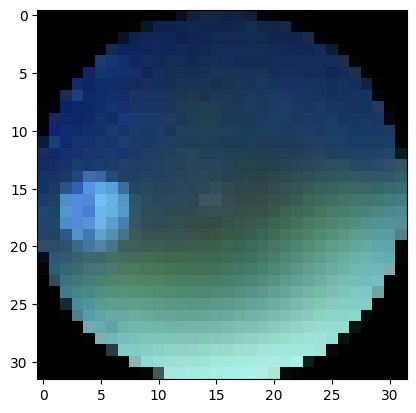

In [14]:
plt.imshow(images[11])

In [15]:
# We divide the dataset in 80% train and 20% test
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
# NumPy arrays
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)


####**5. Now this is the convolutional part**

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

####**6. This is the classification part**

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

####**7. Now it's time to train and compile our A.I.**

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_train, labels_train, epochs=50,
                    validation_data=(images_test, labels_test))

Epoch 1/50
73/73 [==============================] - 4s 42ms/step - loss: 2.0454 - accuracy: 0.4704 - val_loss: 1.0094 - val_accuracy: 0.4503
Epoch 2/50
73/73 [==============================] - 3s 39ms/step - loss: 0.8689 - accuracy: 0.5805 - val_loss: 0.7976 - val_accuracy: 0.6182
Epoch 3/50
73/73 [==============================] - 4s 62ms/step - loss: 0.7531 - accuracy: 0.6602 - val_loss: 0.7119 - val_accuracy: 0.6644
Epoch 4/50
73/73 [==============================] - 3s 45ms/step - loss: 0.7223 - accuracy: 0.6919 - val_loss: 0.6927 - val_accuracy: 0.6764
Epoch 5/50
73/73 [==============================] - 3s 40ms/step - loss: 0.6519 - accuracy: 0.7228 - val_loss: 0.6837 - val_accuracy: 0.6918
Epoch 6/50
73/73 [==============================] - 3s 39ms/step - loss: 0.6183 - accuracy: 0.7369 - val_loss: 0.6423 - val_accuracy: 0.7295
Epoch 7/50
73/73 [==============================] - 4s 52ms/step - loss: 0.5740 - accuracy: 0.7579 - val_loss: 0.6367 - val_accuracy: 0.7363
Epoch 8/50
73

After training, it has an accuracy of 78%, that's pretty good since we're working with eyes diseases, so we need a lot of data for the A.I. to actually learn. We used another dataset, but it didn't have enough images so our accuracy was of 40%.

####**8. After training, we graph the results**

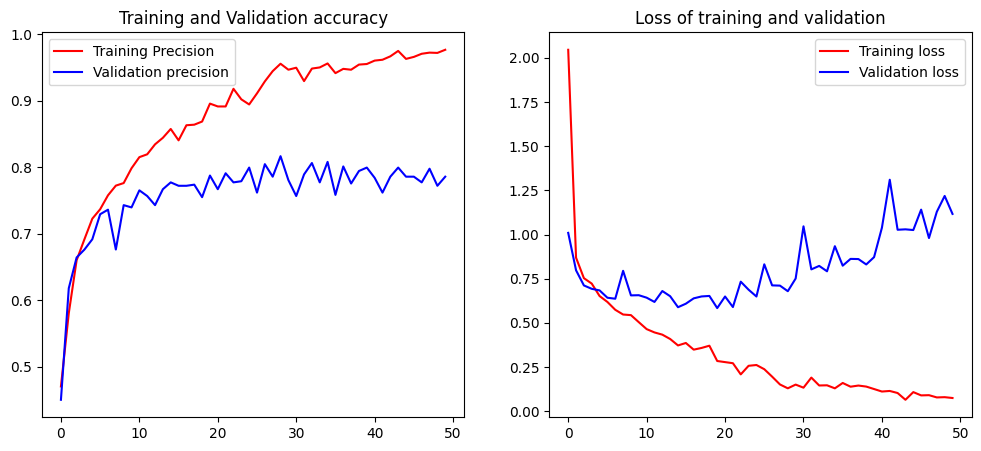

In [22]:
epochs = range(len(history.history['accuracy']))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Precision')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation precision')
plt.title('Training and Validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Loss of training and validation')
plt.legend()

plt.show()

####**9. Predictions**

In [34]:
predictions = model.predict(images_test)


19/19 [==============================] - 0s 19ms/step


In [37]:
predictions[0]


array([-15.552833 ,   1.6877923,  -2.5468853,  10.468418 , -14.333937 ],
      dtype=float32)

In [38]:
model.save('modelo.h5')

loaded_model = tf.keras.models.load_model('modelo.h5')

predictions = loaded_model.predict(images_test)

predicted_labels = np.round(predictions).flatten()

print('Predicted tags:', predicted_labels)
print('real labels:', labels_test)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 0s 11ms/step
Predicted tags: [-16.   2.  -3. ...   9.  -2. -13.]
real labels: [3 2 3 3 2 1 3 1 3 3 2 2 1 2 3 1 3 3 1 3 2 1 3 2 3 2 1 2 2 3 3 1 1 3 3 3 2
 2 2 2 3 3 1 3 1 3 2 1 1 1 3 1 1 2 3 2 1 2 1 1 3 1 3 1 1 1 3 1 2 2 2 2 1 3
 2 1 1 1 3 3 3 3 3 2 2 2 2 2 2 1 2 2 1 1 1 2 2 2 3 3 2 3 1 2 3 2 3 2 3 3 3
 3 1 1 2 3 3 3 3 1 1 2 1 2 3 3 3 3 3 2 2 2 1 3 1 1 1 2 3 1 3 3 2 3 2 3 3 1
 1 1 1 3 3 2 3 2 1 2 2 3 1 2 3 2 3 3 1 2 2 1 2 3 2 1 3 3 2 2 3 1 1 2 3 1 1
 1 1 3 1 1 3 2 1 2 2 1 1 3 2 2 1 2 1 1 2 1 2 3 3 3 2 1 2 3 2 3 2 1 3 2 2 2
 2 3 2 3 2 2 3 3 1 1 1 2 2 3 1 3 2 1 1 3 2 3 2 1 2 3 1 3 3 2 1 2 3 3 2 3 1
 1 1 1 2 1 2 2 2 1 2 2 1 2 2 3 3 3 2 1 2 2 3 1 2 1 1 1 3 1 1 2 2 3 3 3 1 3
 1 2 1 3 3 3 1 2 2 1 3 3 1 2 1 1 3 1 2 1 1 1 1 3 1 2 3 3 2 1 3 3 2 3 3 3 1
 2 2 1 2 2 2 1 1 1 1 1 2 3 1 2 3 1 1 2 2 2 3 3 1 2 3 3 3 3 2 1 3 2 1 2 1 3
 2 3 2 2 2 1 2 2 3 1 1 3 2 3 2 1 1 1 1 1 1 1 1 2 2 1 3 1 3 1 2 3 3 3 1 3 1
 1 3 1 3 1 3 2 3 2 1 1 3 1 2 1 2 3 1 2 3 1 3 3 1 1 3 3 3